## Task 1  Generating musical note

### Import necessary packages

In [2]:
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np

### Creat single note

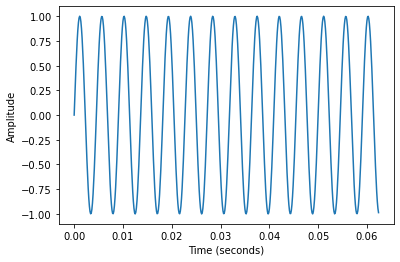

In [3]:
t = np.linspace(0,1,8000)
f = 220
note = np.sin(2*np.pi*f*t)
plt.plot(t[:500],note[:500]) #plots first 500 samples
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
sa.play_buffer((32767*note).astype('int16'), 1, 2, 8000).wait_done()

### Create multiple notes

In [4]:
notes = []
freq = 220.0
for i in range(0,10,1):
    t = np.linspace(0, 1, 1*8000)
    current_freq = freq * 2 **(i/12)
    note = np.sin(2 * np.pi * current_freq * t)
    notes.append(note)
full_note = np.concatenate(notes)
                              
sa.play_buffer((32767*full_note).astype('int16'), 1, 2, 8000).wait_done()

In [5]:
#created new functions

def play_note(note):
    sa.play_buffer((note * 32767).astype('int16'), 1, 2, 8000).wait_done()

def generateNote(frequency, duration, samplingRate):
    rest = np.zeros(1000)
    time = np.linspace(0, duration, int(samplingRate * duration))
    
    note = np.sin(2 * np.pi * frequency * time)
    
    return np.concatenate((note, rest))

In [6]:
# Initializing different notes
rate = 8000

A = generateNote(220, 0.5, rate)
A_half = generateNote(220, 1.0, rate)
A_whole = generateNote(220, 2.0, rate)
B = generateNote(220 * 2**(2/12), 0.5, rate)
C = generateNote(220 * 2**(3/12), 0.5, rate)
D = generateNote(220 * 2**(5/12), 0.5, rate)
E = generateNote(220 * 2**(7/12), 0.5, rate)
F = generateNote(220 * 2**(8/12), 0.5, rate)
G = generateNote(220 * 2**(10/12), 0.5, rate)

In [7]:
Scarborough_fair = np.concatenate((A_half,A,E,E,E,B,C,B,A_whole))

In [8]:
play_note(Scarborough_fair)

## Task 2 ADSR

In [9]:
t = np.linspace(0,1,8000)
f = 220.0
note=np.sin(2*np.pi*f*t)

a = np.linspace(0.0, 0.9, int(0.2*8000))
d = np.linspace(0.9, 0.7, int(0.2*8000))
s = np.linspace(0.7, 0.7, int(0.5*8000))
r = np.linspace(0.7, 0.0, int(0.1*8000))
env = np.concatenate([a,d,s,r])
sa.play_buffer((32767*note*env).astype('int16'), 1, 2, 8000).wait_done()

In [10]:
#created ADSR functions

def play_note_ADSR(note):
    sa.play_buffer((note * 32767).astype('int16'), 1, 2, 8000).wait_done()
    

def generate_envelope(duration):
    A_duration = 0.2 * duration
    D_duration = 0.2 * duration
    S_duration = 0.5 * duration
    R_duration = 0.1 * duration
    
    A = np.linspace(0.0, 0.9, int(A_duration * 8000))
    D = np.linspace(0.9, 0.7, int(D_duration * 8000))
    S = np.linspace(0.7, 0.7, int(S_duration * 8000))
    R = np.linspace(0.7, 0.0, int(R_duration * 8000))
    
    return np.concatenate([A,S,D,R])


def generateNote_ADSR(frequency, duration, samplingRate):
    time = np.linspace(0, duration, int(samplingRate * duration))
    envelope = generate_envelope(duration)
    
    note = np.sin(2 * np.pi * frequency * time) * envelope
    
    return note

In [19]:
# Inatialing different notes
rate = 8000

A = generateNote_ADSR(220, 0.5, rate)
A_half = generateNote_ADSR(220, 1.0, rate)
A_whole = generateNote_ADSR(220, 2.0, rate)
B = generateNote_ADSR(220 * 2**(2/12), 0.5, rate)
C = generateNote_ADSR(220 * 2**(3/12), 0.5, rate)
D = generateNote_ADSR(220 * 2**(5/12), 0.5, rate)
E = generateNote_ADSR(220 * 2**(7/12), 0.5, rate)
F = generateNote_ADSR(220 * 2**(8/12), 0.5, rate)
G = generateNote_ADSR(220 * 2**(10/12), 0.5, rate)

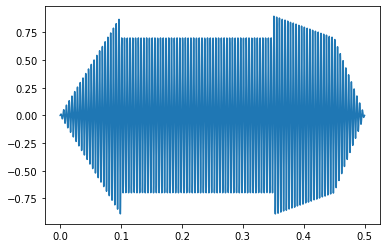

In [20]:
#generating plot of one of the note to troubleshoot and verify the result
plt.plot(t[:4000], A)

In [21]:
Scarborough_fair = np.concatenate((A_half,A,E,E,E,B,C,B,A_whole))

In [22]:
play_note(Scarborough_fair)

Task 2 notes:

The enveloped note song much smoother than the song produced from the task 1.

The rest from the generateNote function was removed as the notes produced through volume variation was distictive enough to be heard idiosyncratically, and we could not overlap the notes in the following task with rest in placed.

Similarly to how we used an array to convey the stage of the ADSR envelope, we would also use an array that included an exponential function that closely modeled the linear functions in the preceding version.

## Task 3 Overlapping notes
### Create two waves

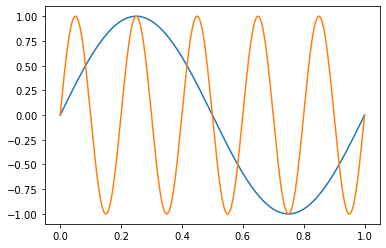

In [23]:
t = np.linspace(0,1,8000)
f = 1.0
note1=np.sin(2*np.pi*f*t)
plt.plot(t,note1)
f2 = 5.0
note2=np.sin(2*np.pi*f2*t)
plt.plot(t,note2)

### Add them together with zero-padding

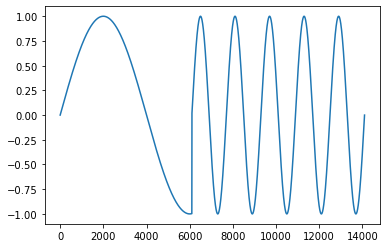

In [24]:
new_note = np.zeros(len(note1)+len(note2)-1900)
new_note[0:len(note1)] = note1
new_note[len(note1)-1900::] = note2
new_t = np.linspace(0,len(new_note),len(new_note))
plt.plot(new_t,new_note)

### Two notes without overlapping

In [25]:
note1 = notes[0]
note2 = notes[1]
sa.play_buffer((32767*note1).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((32767*note2).astype('int16'), 1, 2, 8000).wait_done()

### Two notes with overlapping

In [29]:
new_note = np.zeros(len(note1)+len(note2)-4000)
new_note[0:len(note1)] = note1
new_note[len(note1)-4000::] = note2
sa.play_buffer((32767*new_note).astype('int16'), 1, 2, 8000).wait_done()

In [34]:
def overlapping(*notes):
    new_note = []
    new_note = np.append(new_note, notes[0])
    #i = 1
    
    for i in range(1, len(notes)):
        temp_note = np.zeros(len(notes[i-1]) + len(notes[i]) - 4000)
        temp_note[0:len(notes[i-1])] = notes[i-1]
        temp_note[len(notes[i-1]) - 4000::] = notes[i]
        new_note = np.append(new_note, temp_note)
        #i = i + 1
        
    return new_note

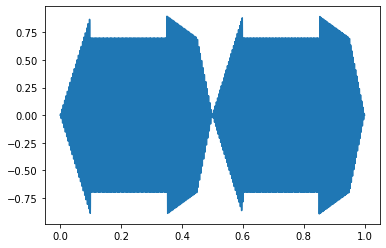

In [39]:
#generating plot of one of the note to troubleshoot and verify the result
overlapped_AB = []
overlapped_AB = overlapping([A,B])
plt.plot(t[:8000], overlapped_AB)

In [40]:
Scarborough_fair_overlapped = overlapping([A_half,A,E,E,E,B,C,B,A_whole])

In [41]:
play_note(Scarborough_fair_overlapped)

ValueError: setting an array element with a sequence.